# Aufgabe 2

In [140]:
import pandas as pd

# Load the datasets
credit_risk_df = pd.read_csv('../../Data/credit_risk/credit_risk_dataset.csv')

# Display the first few rows of each dataset to understand their structure
credit_risk_df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3


### Übung 1: Einführung in logistische Regression

Untersuchen Sie, ob das Einkommen (person_income) eines Kreditnehmers einen Einfluss auf den Kreditstatus (loan_status) hat. Führen Sie eine einfache logistische Regression durch und interpretieren Sie das Ergebnis des Koeffizienten für das Einkommen.

In [141]:
import statsmodels.api as sm

# Hint: Add a constant to the DataFrame
X = sm.add_constant(credit_risk_df['person_income'])
y = credit_risk_df['loan_status']

# Create and fit the model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.495559
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32579
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                 0.05531
Time:                        20:06:08   Log-Likelihood:                -16146.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1115      0.031     -3.542      0.000      -0.173      -0.050
person_income -2.033

### Übung 2: Kategorische Variablen einbeziehen

Untersuchen Sie den Einfluss der Wohnsituation (person_home_ownership) auf den Kreditstatus (loan_status). Wandeln Sie die kategorische Variable in Dummy-Variablen um und führen Sie eine logistische Regression durch.

In [142]:
# Hint: Convert the categorical variable into dummy variables
person_home_ownership_dummies = pd.get_dummies(credit_risk_df['person_home_ownership'], drop_first=True)

# Hint: Add the dummy variables to the model
X = sm.add_constant(person_home_ownership_dummies)

### Übung 3: Beziehung zwischen Kreditbetrag und Kreditstatus

Analysieren Sie, wie der Kreditbetrag (loan_amnt) mit dem Kreditstatus (loan_status) zusammenhängt. 
Implementieren Sie eine logistische Regression und interpretieren Sie den Koeffizienten des Kreditbetrags.

In [143]:
X = sm.add_constant(credit_risk_df['loan_amnt'])

# Use the same approach as in Exercise 1 to create and fit the model

### Übung 4: Einfluss der Beschäftigungsdauer

Prüfen Sie, ob die Beschäftigungsdauer (person_emp_length) eines Kreditnehmers einen Effekt auf die Wahrscheinlichkeit eines Kreditausfalls (loan_status) hat. Führen Sie eine logistische Regression durch und diskutieren Sie die Ergebnisse.

In [144]:
X = sm.add_constant(credit_risk_df['person_emp_length'])

# Create and fit the model, similar to previous exercises

### Übung 5: Modellgüte evaluieren

Wählen Sie eines der oben erstellten Modelle und evaluieren Sie dessen Güte. Berechnen Sie hierfür die Modellgüte anhand der Konfusionsmatrix und berechnen Sie die Genauigkeit (Accuracy) des Modells.

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the datasets
credit_risk_df = pd.read_csv('../../Data/credit_risk/credit_risk_dataset.csv')

# Hint: Make predictions based on your model
# Assuming `model` is your fitted model from one of the previous exercises
y_pred = model.predict(X) > 0.5  # Choose a threshold, e.g., 0.5

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[25473     0]
 [ 7108     0]]
Accuracy: 0.7818360394094718


# Lösungen

In [146]:
import statsmodels.api as sm
X = sm.add_constant(credit_risk_df['person_income'])
y = credit_risk_df['loan_status']

# Create and fit the model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.495559
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32579
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                 0.05531
Time:                        20:06:08   Log-Likelihood:                -16146.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1115      0.031     -3.542      0.000      -0.173      -0.050
person_income -2.033

### Übung 1

**Interpretation:**

Der negative Koeffizient für *person_income* bedeutet, dass mit steigendem Einkommen die Log-Odds sinken (Kreditnehmer gerät in Verzug  (d.h., loan_status = 1)). In anderen Worten, höheres Einkommen ist mit einer geringeren Wahrscheinlichkeit eines Kreditausfalls verbunden.

Für jede Einheitserhöhung im Einkommen (hier jede zusätzliche Geldeinheit bzw. 1$), sinken die Log-Odds eines Kreditausfalls um 0.00002033. Obwohl diese Änderung klein ist, ist sie über den gesamten Einkommensbereich hinweg signifikant, insbesondere bei grossen Unterschieden im Einkommen.

**Schlussfolgerung:**  
Einkommen eines Kreditnehmers hat einen signifikanten Einfluss auf den Kreditstatus. Speziell zeigt die Analyse, dass ein höheres Einkommen mit einer geringeren Wahrscheinlichkeit eines Kreditausfalls assoziiert ist. Diese Ergebnisse unterstützen Annahme, dass das Einkommen ein wichtiger Faktor bei der Beurteilung des Kreditrisikos ist. ​ 

Der Pseudo R-Squared ist bei rund 5%, ergo erklärt das Modell nur 5% der Varianz.  
Log-Likelihood vs. LL-Null (=kein Modell) zeigt, dass das Modell etwas besser ist als kein Modell (Log-Likelihood näher bei 0 = besser)

Mögliche Ansatzpunkte/Verbesserungen:

- Mehr Prädiktoren einbeziehen: Niedrigr Pseudo-R2-Squared deutet darauf hin, dass das Einkommen der Person allein kein starker Prädiktor für den Kreditstatus ist. Die Einbeziehung zusätzlicher Variablen (z. B. Kreditwürdigkeit, Kreditbetrag, Beschäftigungsstatus usw.) könnte die Vorhersagekraft des Modells verbessern.

- Feature Engineering: Erstellung neuer Features aus vorhandenen Daten (z. B. Einteilung des Einkommens in Bereiche, Interaktionsterme) könnten ggf. komplexere Beziehungen zwischen den Prädiktoren und dem Ergebnis aufzeigen.

- Modellkomplexität: Hinzufügen weiterer Prädiktoren kann das Modell zwar verbessern, kann dann aber zu Overfitting führen. Regularization (z. B. Ridge- oder Lasso-Regression) können verwendet werden, um Overfitting zu verhindern, wenn die Modellkomplexität erhöht wird.

- Überprüfen der Modellannahmen: Sicherstellen, dass Annahmen der logistischen Regression erfüllt sind, inkl. der Linearität der Log-Odds und Abwesenheit von Multikollinearität zwischen den Prädiktoren.

- Modell-Diagnosen: Ausreisser oder "einflussreiche" Punkte finden, die die Leistung des Modells beeinträchtigen könnten, zu ermitteln. Eine Analyse der Residuals u.a. mit QQ-Plots etc. kann helfen.

- Cross Validation: Beurteilen, wie gut das Modell auf "unbekannte" Daten generalisiert (Train/Test Split). Dies kann helfen, die Robustheit des Modells zu bestimmen.

...

### Übung 2: 

In [182]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
credit_risk_df = pd.read_csv('../../Data/credit_risk/credit_risk_dataset.csv')

# Step 1: Convert 'person_home_ownership' into numeric dummy variables
# Using 'astype(int)' to convert boolean values to integers (0/1)
person_home_ownership_dummies = pd.get_dummies(credit_risk_df['person_home_ownership'], drop_first=True).astype(int)

# Step 2: Prepare the target variable
# Ensure it's numeric (integer) and handle missing values if there are any
Y = credit_risk_df['loan_status'].astype(int)

# It's a good practice to check for and handle missing values in your dataset PROPERLY
# Imputing coula be a suitable strategy e.g. https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91
# For simplicity, we will proceed assuming no significant missing values in 'loan_status'

# Step 3: Add the dummy variables to the model, including a constant term for the intercept
X = sm.add_constant(person_home_ownership_dummies)

# Step 4: Conduct the logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print the summary to interpret the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.493897
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32577
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                 0.05848
Time:                        20:26:07   Log-Likelihood:                -16092.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9395      0.026    -74.551      0.000      -1.990      -1.888
OTHER          1.1319      0.

Koeffizienten stellen die Log-Odds von loan_status dar, die mit jeder Kategorie von person_home_ownership verbunden sind, verglichen mit der Basiskategorie. 
MORTGAGE ist die "Basiskategorie" (1. in alphabetischer Ordnung bzw. nicht in Summary), kann jeder Koeffizient wie folgt interpretiert werden (werden Kategorieren genutzt ist der Vergleich immer mit der Basiskategorie):

- const (-1,9395): Ist die logarithmische Wahrscheinlichkeit dar, dass loan_status für die Basiskategorie (MORTGAGE) den Wert 1 hat, wobei alle anderen Variablen konstant bleiben.

- OTHER (1,1319): Logarithmische Wahrscheinlichkeit, dass der Kreditstatus 1 ist, für Personen der Gruppe SONSTIGES (person_home_ownership) um 1.1319 Einheiten höher ist als für Personen mit dem Merkmal MORTGAGE, wenn alle anderen Variablen konstant bleiben.

- OWN (-0,5773): zeigt an, dass die logarithmische Wahrscheinlichkeit, dass der loan_status 1 ist, für Personen, die ihr Haus besitzen, um 0.5773 Einheiten geringer ist als für Personen mit MORTGAGE. Dies deutet darauf hin, dass der Besitz von Wohneigentum mit einer geringeren Wahrscheinlichkeit verbunden ist, dass das durch loan_status definierte Ergebnis 1 (=Kreditausfall) ist.

- RENT (1,1659): Logarithmische Wahrscheinlichkeit, dass loan_status 1 ist, für Mieter um 1.1659 Einheiten höher ist als für Personen mit MORTGAGE, was auf einen stärkeren Zusammenhang mit dem Ergebnis für Mieter hindeutet.

Um diese Log-Odds in Odd Ratios umzuwandeln, kann via np.exp() der Wert berechnet werden.

- Für OTHER beträgt das Odds Ratio exp(1.1319), was bedeutet, dass die Wahrscheinlichkeit, dass der Kreditstatus 1 ist, für Personen in der Kategorie OTHER etwa 3.1 mal höher ist als für Personen mit MORTGAGE (Vergleich mit Basiskategorie).
- Für OWN ist das Odds Ratio exp(-0.5773), was bedeutet, dass die Wahrscheinlichkeit, dass der loan_status 1 ist, für Eigenheimbesitzer etwa 0.56 niedriger ist als für Personen mit einer MORTGAGE.
- Für RENT beträgt das Odds Ratio exp(1.1659), was bedeutet, dass die Wahrscheinlichkeit, dass der loan_status 1 ist, für Mieter im Vergleich zu Personen mit einer MORTGAGE etwa 3.2 mal höher ist.

In [183]:
# "Inverse" the coefs to interpret them
import numpy as np
np.exp(3.784e-05)

1.0000378407159418

### Übung 3

In [184]:
# credit_risk_df should be already loaded and available

# Step 1: Prepare the target variable
Y = credit_risk_df['loan_status'] # Should be dummy and INT
X = sm.add_constant(credit_risk_df['loan_amnt'])

# Step 2: Conduct the logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print the summary to interpret the results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.519273
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32579
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                 0.01011
Time:                        20:26:12   Log-Likelihood:                -16918.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                 4.192e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6551      0.025    -66.513      0.000      -1.704      -1.606
loan_amnt   3.784e-05   2.01e

**Interpretation des Koeffizienten**  
Positive Koeffizient für loan_amnt deutet auf einen positiven Zusammenhang zwischen dem Kreditbetrag und der Wahrscheinlichkeit, dass loan_status 1 ist, hin. Für jeden Dollar, um den sich der Kreditbetrag erhöht, steigt die logarithmische Wahrscheinlichkeit, dass der Kreditstatus 1 ist (=Ausfall), wenn andere Faktoren konstant bleiben.  

- Statistische Signifikanz:  Zusammenhang zwischen Kredit und Status ist statistisch signifikant (p-Wert < 0.0001), was bedeutet, dass der beobachtete Effekt *wahrscheinlich* nicht auf Zufall beruht.

- Stärke des Effekts: Obwohl statistisch signifikant, ist die Effektgröße pro $ (also Einheit) gering. Wenn man jedoch bedenkt, dass es bei Krediten oft um hohe Beträge geht, 
kann der Gesamteffekt auf den loan_status über die typische Bandbreite von Kreditbeträgen wesentlich grösser sein.

- "Erklärungskraft" des Modells: Der Pseudo-R-Squared (0.01011) deutet darauf hin, dass loan_amnt allein nur etwa 1.011 % der Varianz im loan_status erklärt, was darauf hindeutet, dass auch andere Faktoren bei der Bestimmung des Darlehensstatus eine Rolle spielen -> Potenziell kein gutes Modell.

Optimization terminated successfully.
         Current function value: 0.519273
         Iterations 5


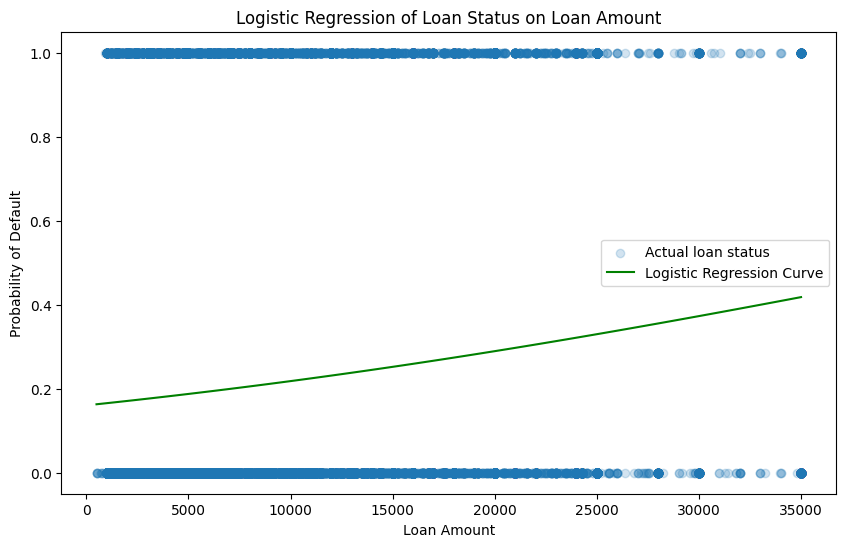

In [150]:
import matplotlib.pyplot as plt
X_loan_amnt = sm.add_constant(credit_risk_df['loan_amnt'])
logit_model_loan_amnt = sm.Logit(y, X_loan_amnt)
result_loan_amnt = logit_model_loan_amnt.fit()

loan_amnt_range = np.linspace(X_loan_amnt['loan_amnt'].min(), X_loan_amnt['loan_amnt'].max(), 100)
X_loan_amnt_pred = sm.add_constant(loan_amnt_range)

probabilities_loan_amnt = result_loan_amnt.predict(X_loan_amnt_pred)
plt.figure(figsize=(10, 6))
plt.scatter(credit_risk_df['loan_amnt'], y, alpha=0.2, label='Actual loan status')
plt.plot(loan_amnt_range, probabilities_loan_amnt, color='green', label='Logistic Regression Curve')
plt.xlabel('Loan Amount')
plt.ylabel('Probability of Default')
plt.title('Logistic Regression of Loan Status on Loan Amount')
plt.legend()
plt.show()

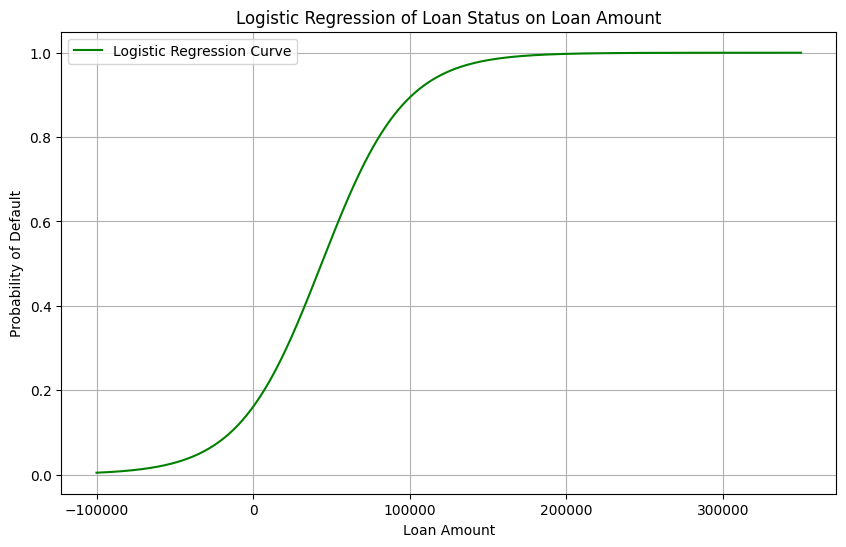

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

beta_0 = -1.6551  # Intercept
beta_1 = 3.784e-05  # Coefficient for loan amount

# Create synthetic data to plot complete function
loan_amounts_synt = np.linspace(-100000, 350000, 1000)

# Recalculate predicted probabilities for the corrected range of loan amounts
log_odds = beta_0 + beta_1 * loan_amounts_synt
probabilities_syth= expit(log_odds)

# Create the corrected plot
plt.figure(figsize=(10, 6))
plt.plot(loan_amounts_synt, probabilities_syth, label='Logistic Regression Curve', color='green')

# Label the plot
plt.title('Logistic Regression of Loan Status on Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Probability of Default')
plt.legend()
plt.grid(True)
plt.show()

Ein Wert von 0.18 auf der Y-Achse bedeutet, dass eine Wahrscheinlichkeit von 18 % besteht, dass das Ergebnis (z. B. der Ausfall eines Kredits) eintritt, wenn der Kreditbetrag 0 ist.

Dies könnte darauf hindeuten, dass es auch ohne Berücksichtigung des Kreditbetrags eine inhärente Basiswahrscheinlichkeit für einen Ausfall gibt, die durch andere, nicht im Modell enthaltene Faktoren wie die Kreditwürdigkeit des Kreditnehmers, externe wirtschaftliche Faktoren oder das Vorhandensein anderer Schulden beeinflusst werden könnte.

### Übung 4


In [185]:
import pandas as pd
import statsmodels.api as sm

# Angenommen, credit_risk_df ist bereits geladen und verfügbar

# Drop rows with missing values in 'person_emp_length'
cleaned_df = credit_risk_df.dropna(subset=['person_emp_length'])

# Prepare the target variable and independent variable with no missing values
Y_cleaned = cleaned_df['loan_status']
X_cleaned = sm.add_constant(cleaned_df['person_emp_length'])  # Add constant to the independent variable

# Conduct the logistic regression
logit_model_cleaned = sm.Logit(Y_cleaned, X_cleaned)
result_cleaned = logit_model_cleaned.fit()

# Print the summary to interpret the results
print(result_cleaned.summary())

Optimization terminated successfully.
         Current function value: 0.517337
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                31686
Model:                          Logit   Df Residuals:                    31684
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                0.007141
Time:                        20:26:29   Log-Likelihood:                -16392.
converged:                       True   LL-Null:                       -16510.
Covariance Type:            nonrobust   LLR p-value:                 3.235e-53
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0430      0.021    -49.669      0.000      -1.084      -1.002
person_e

Koeffizient für Beschäftigungsdauer: Der negative Koeffizient (−0,0551) zeigt, dass mit jedem zusätzlichen Jahr der Beschäftigungsdauer die Wahrscheinlichkeit eines Kreditausfalls sinkt. Längere Beschäftigung führt also zu geringerem Ausfallrisiko.

Statistische Signifikanz: Kleiner p-Wert indiziert, dass der Zusammenhang zwischen Beschäftigungsdauer und Kreditausfall statistisch signifikant ist.

Interpretation des Koeffizienten: Für jedes zusätzliche Beschäftigungsjahr verringern sich die Log-Odds für einen Kreditausfall um 0.0551, wenn alle anderen Faktoren gleich bleiben. Dies deutet darauf hin, dass Personen mit längerer Beschäftigungszeit weniger wahrscheinlich einen Kreditausfall haben.

Modellanpassung / Erklärungskraft: Pseudo-R-Quadrat-Wert von 0.007141 bedeutet, dass das Modell nur etwa 0.714% der Varianz im Kreditausfall erklärt. Obwohl der "Beschäftigungsdauer-Effekt" signifikant ist, gibt es andere Faktoren, die auch wichtig sind und nicht berücksichtigt wurden.

Ergo zeigt die Analyse zeigt einen signifikanten negativen Zusammenhang zwischen der Beschäftigungsdauer eines Kreditnehmers und der Wahrscheinlichkeit eines Kreditausfalls. Die Beschäftigungsdauer allein bietet jedoch nur eine geringe Erklärung für das Risiko eines Kreditausfalls.

# Übung 5

In [186]:
# Load the dataset
credit_risk_df = pd.read_csv('../../Data/credit_risk/credit_risk_dataset.csv')

# Step 1: Convert 'person_home_ownership' into numeric dummy variables
# Using 'astype(int)' to convert boolean values to integers (0/1)
person_home_ownership_dummies_real = pd.get_dummies(credit_risk_df['person_home_ownership'], drop_first=True)
person_home_ownership_dummies = pd.get_dummies(credit_risk_df['person_home_ownership'], drop_first=True).astype(int)

# Step 2: Prepare the target variable
# Ensure it's numeric (integer) and handle missing values if there are any
Y = credit_risk_df['loan_status'].astype(int)

# It's a good practice to check for and handle missing values in your dataset
# This could be done either by dropping missing values or imputing them
# For simplicity, here we will proceed assuming no significant missing values in 'loan_status'
# Add a line like 'credit_risk_df.dropna(subset=['loan_status'], inplace=True)' if needed

# Step 3: Add the dummy variables to the model, including a constant term for the intercept
X = sm.add_constant(person_home_ownership_dummies)

# Step 4: Conduct the logistic regression
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

# Print the summary to interpret the results
print(result.summary())

# Making predictions using the fitted model
# Here we get the probability of loan_status being 1 and convert it to binary outcomes based on a threshold
y_pred_prob = result.predict(X)
y_pred = y_pred_prob > 0.5

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(Y, y_pred)
accuracy = accuracy_score(Y, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Optimization terminated successfully.
         Current function value: 0.493897
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32577
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                 0.05848
Time:                        20:26:33   Log-Likelihood:                -16092.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9395      0.026    -74.551      0.000      -1.990      -1.888
OTHER          1.1319      0.

Konfusionsmatrix-Interpretation:  
- True Negative (TN): 25'473 Fälle wurden korrekt als Nicht-Ausfälle vorhergesagt. Das Modell hat diese Anzahl an Krediten richtig identifiziert, die nicht ausgefallen sind.
- False Positive (FP): 0 Fälle wurden fälschlicherweise als Ausfälle vorhergesagt, obwohl sie tatsächlich Nicht-Ausfälle waren. Das Modell hat keinen Nicht-Ausfall irrtümlich als Ausfall markiert.
- False Negative (FN): 7'108 Fälle wurden fälschlicherweise als Nicht-Ausfälle vorhergesagt, obwohl sie tatsächliche Ausfälle waren. Das Modell hat viele tatsächliche Kreditausfälle nicht erkannt.
- True Positive (TP): 0 Fälle wurden korrekt als Ausfälle vorhergesagt. Das Modell hat keinen tatsächlichen Ausfall korrekt identifiziert.

Genauigkeitsinterpretation:
- Genauigkeit (Accuracy): Etwa 78,18%. Diese Metrik zeigt den Anteil der insgesamt richtig vorhergesagten Vorhersagen (sowohl Ausfälle als auch Nicht-Ausfälle). Die hohe Genauigkeit täuscht jedoch über ein kritisches Problem hinweg.

Schlüsselbeobachtungen:
Modell zeigt eine starke Tendenz zur Vorhersage von Nicht-Ausfällen und versagt darin, tatsächliche Ausfälle zu identifizieren. Dies könnte auf ein unausgeglichenes Datenset oder ein Modell zurückzuführen sein, das die Komplexität von Ausfällen nicht erfasst.
Die hohe Genauigkeit ist in diesem Kontext irreführend, da sie die Unfähigkeit des Modells, tatsächliche Ausfälle korrekt zu identifizieren, nicht berücksichtigt. Dies wird als Genauigkeitsparadox bezeichnet.

**Fazit:**  
Obwohl das Modell eine hohe Genauigkeit aufweist, ist es in der Praxis unbrauchbar, um das Risiko von Kreditausfällen vorherzusagen. Die vollständige Abwesenheit von richtigen positiven Vorhersagen deutet darauf hin, dass die Vorhersagefähigkeiten des Modells verzerrt sind. Genauigkeit allein ist kein ausreichendes Maß für die Leistung des Modells, besonders wenn die Vorhersage einer der Klassen (in diesem Fall Kreditausfälle) entscheidend ist. Weitere Evaluierungsmetriken wie Präzision, Recall (Sensitivität), F1-Score und die ROC-Kurve sollten berücksichtigt werden, um ein umfassenderes Verständnis der Modellleistung zu erhalten und dessen aktuelle Einschränkungen zu adressieren.

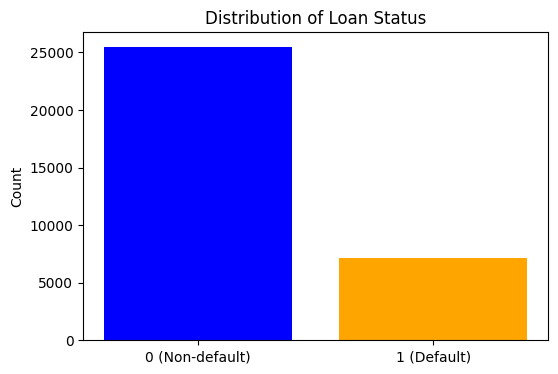

(78.18360394094718, 21.816396059052824)

In [187]:
# Count the occurrences of each category in loan_status
loan_status_counts = credit_risk_df['loan_status'].value_counts()

# Calculating the ratio between the two categories
ratio_0_to_1 = loan_status_counts[0] / loan_status_counts[1]

# Plotting the distribution of loan_status
categories = [0,1]
counts = list(loan_status_counts.values)

plt.figure(figsize=(6, 4))
plt.bar(categories, counts, color=['blue', 'orange'])
plt.xticks(categories, ['0 (Non-default)', '1 (Default)'])
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

# Calculating the ratio in percent
total_counts = sum(loan_status_counts.values)
percent_0 = (loan_status_counts[0] / total_counts) * 100
percent_1 = (loan_status_counts[1] / total_counts) * 100

percent_0, percent_1

Wir können auch probieren alle möglichen Kombinationen zu probieren...

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import numpy as np

# Load the dataset
credit_risk_df = pd.read_csv('../../Data/credit_risk/credit_risk_dataset.csv')

# List of all variables except the target
all_variables = list(credit_risk_df.drop('loan_status', axis=1).columns)

# Handle missing values. For simplicity, let's drop rows with any missing values. Usual steps:
# - Impute missing values (Mean imputing can be used but is often "too simple")
# - Remove or adjust outliers, check why the outliers occur. Maybe cluster the dataset to identify outliers
# - Encode categorical variables
# - Normalize numerical variables
# ...
credit_risk_df = credit_risk_df.dropna().reset_index(drop=True)

# Total number of variables for each combination to test
total_variables_list = [1,2,3,4,5,6,7,8,9,10]  #Different combinations with X variables

best_score = -np.inf
best_combination = None
best_model = None

for total_vars in total_variables_list:
    for combo in combinations(all_variables, total_vars):
        
        # Identify categorical and numerical variables in the current combination
        categorical_vars = [var for var in combo if credit_risk_df[var].dtype == 'object' or credit_risk_df[var].nunique() < 10]
        numerical_vars = [var for var in combo if var not in categorical_vars]
        
        # Preprocess the combination of variables
        if categorical_vars:
            X_categorical = pd.get_dummies(credit_risk_df[categorical_vars], drop_first=True)
        else:
            X_categorical = pd.DataFrame()
            
        if numerical_vars:
            X_numerical = credit_risk_df[numerical_vars]
            scaler = StandardScaler()
            X_numerical = pd.DataFrame(scaler.fit_transform(X_numerical), columns=numerical_vars, index=X_numerical.index)
        else:
            X_numerical = pd.DataFrame()
        
        X = pd.concat([X_numerical, X_categorical], axis=1)
        y = credit_risk_df.loc[X.index, 'loan_status']  # Ensure y is aligned with X using the same index
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train the logistic regression model
        logistic_model = LogisticRegression(max_iter=1000, random_state=42)
        logistic_model.fit(X_train, y_train)
        
        # Evaluate the model
        roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

        # Update the best model if the current model performs better
        if roc_auc > best_score:
            best_score = roc_auc
            best_combination = combo
            best_model = logistic_model

In [189]:
from sklearn.metrics import classification_report, confusion_matrix

print(f"Best Combination of Variables: {best_combination}")
print(f"Best ROC-AUC Score: {best_score}")

# Re-fit the best model on the entire dataset with the best combination
categorical_vars_best = [var for var in best_combination if credit_risk_df[var].dtype == 'object' or credit_risk_df[var].nunique() < 10]
numerical_vars_best = [var for var in best_combination if var not in categorical_vars_best]

# Preprocess the combination of variables for the best combination
if categorical_vars_best:
    X_categorical_best = pd.get_dummies(credit_risk_df[categorical_vars_best], drop_first=True)
else:
    X_categorical_best = pd.DataFrame()
    
if numerical_vars_best:
    X_numerical_best = credit_risk_df[numerical_vars_best]
    scaler = StandardScaler()
    X_numerical_best = pd.DataFrame(scaler.fit_transform(X_numerical_best), columns=numerical_vars_best, index=X_numerical_best.index)
else:
    X_numerical_best = pd.DataFrame()

X_best = pd.concat([X_numerical_best, X_categorical_best], axis=1)
y_best = credit_risk_df.loc[X_best.index, 'loan_status']  # Ensure y is aligned with X using the same index

# Split the data for the best model
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.2, random_state=42)

# Re-fit the best model
best_model.fit(X_train_best, y_train_best)

# Predictions and model evaluation
y_pred_best = best_model.predict(X_test_best)
conf_matrix = confusion_matrix(y_test_best, y_pred_best)
class_report = classification_report(y_test_best, y_pred_best)

# Summary of the best model
coefficients = best_model.coef_[0]
features = X_train_best.columns
coef_summary = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Display the summary
print(f"\nBest Model Coefficients:\n{coef_summary}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Best Combination of Variables: ('person_age', 'person_income', 'person_home_ownership', 'loan_intent', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file')
Best ROC-AUC Score: 0.8568198477734835

Best Model Coefficients:
                        Feature  Coefficient
0                    person_age    -0.020387
1                 person_income     0.034755
2                     loan_amnt    -0.553796
3                 loan_int_rate     1.033058
4           loan_percent_income     1.303580
5   person_home_ownership_OTHER     0.428508
6     person_home_ownership_OWN    -1.592370
7    person_home_ownership_RENT     0.748504
8         loan_intent_EDUCATION    -0.819060
9   loan_intent_HOMEIMPROVEMENT     0.074576
10          loan_intent_MEDICAL    -0.181402
11         loan_intent_PERSONAL    -0.602133
12          loan_intent_VENTURE    -1.049226
13  cb_person_default_on_file_Y     0.089163

Confusion Matrix:
[[4241  202]
 [ 693  592]]

Classification Report:
     

In [190]:
# Re-fit the best model on the entire dataset with the best combination of variables
best_model.fit(X_best, y_best)

# Predict on the entire dataset
y_pred_entire = best_model.predict(X_best)
conf_matrix_entire = confusion_matrix(y_best, y_pred_entire)
class_report_entire = classification_report(y_best, y_pred_entire)

# Display the summary for the entire dataset
print(f"\nModel Evaluation on the complete Dataset")
print("\nConfusion Matrix:")
print(conf_matrix_entire)
print("\nClassification Report:")
print(class_report_entire)


Model Evaluation on the complete Dataset

Confusion Matrix:
[[21338  1097]
 [ 3236  2967]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22435
           1       0.73      0.48      0.58      6203

    accuracy                           0.85     28638
   macro avg       0.80      0.71      0.74     28638
weighted avg       0.84      0.85      0.84     28638



In [191]:
# Reset index to ensure alignment
credit_risk_df.reset_index(drop=True, inplace=True)

# For categorical/numerical variables in best_combination
categorical_vars = [var for var in best_combination if credit_risk_df[var].dtype == 'object']
numerical_vars = [var for var in best_combination if var not in categorical_vars]

X_categorical_best = pd.get_dummies(credit_risk_df[categorical_vars], drop_first=True) if categorical_vars else pd.DataFrame()
X_numerical_best = credit_risk_df[numerical_vars] if numerical_vars else pd.DataFrame()

X_best = pd.concat([X_numerical_best, X_categorical_best], axis=1)
y_best = credit_risk_df['loan_status']

# Ensure y_best is aligned and has the same index as X_best
y_best = y_best.loc[X_best.index]

# Add constant for intercept
X_sm = sm.add_constant(X_best)

# Fit the model using statsmodels
logit_model = sm.Logit(y_best.astype(float), X_sm.astype(float))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.358830
         Iterations 7


In [192]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                28638
Model:                          Logit   Df Residuals:                    28623
Method:                           MLE   Df Model:                           14
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                  0.3133
Time:                        20:28:11   Log-Likelihood:                -10276.
converged:                       True   LL-Null:                       -14965.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -6.4065      0.130    -49.419      0.000      -6.661      -6.152
person_age                     -0.0057      0.003     -1.944      0.052      -0.

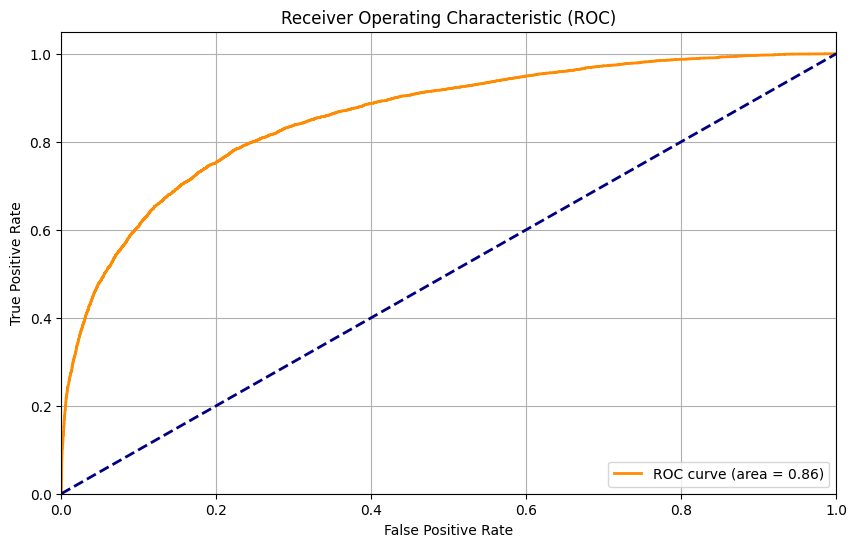

In [193]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_best, pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()